In [5]:
import tensorflow as tf
import os
import cv2
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input

In [2]:
images = list()
labels = list()
label_legend = ["Cat", "Dog"]
data_path = r'D:\Datasets\PetImages'
for di in os.listdir(data_path):
    d = os.path.join(data_path, di)
    for img in os.listdir(d):
        pat = os.path.join(d, img)
        im = cv2.imread(pat)  
        try:
            im_res = cv2.resize(im, (32, 32), interpolation= cv2.INTER_AREA)
            images.append(im_res)
            labels.append(label_legend[di])
        except:
            continue

KeyboardInterrupt: 

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(2, activation="softmax"),
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(np.array(images), np.array(labels), epochs=20)

  ...
    to  
  ['...']
Train for 24998 steps
Epoch 1/20
  726/24998 [..............................] - ETA: 5:02 - loss: 0.7024

KeyboardInterrupt: 

Image number: 56
Cat


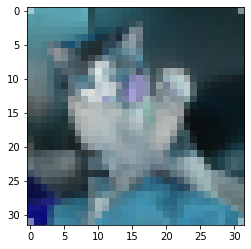

In [36]:
inp = int(input('Image number: '))
image = np.array(images[inp])
image1 = np.expand_dims(image, axis=0)
plt.imshow(image)
p = model.predict(image1)
i = np.argmax(p)
print(label_legend[i])